<a href="https://colab.research.google.com/github/ttevhide/Women_In_Tech/blob/main/Scottish_universities_subject_enrolment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import janitor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

url= "https://github.com/ttevhide/Women_In_Tech/blob/main/DataSet/figure-13.csv?raw=true"
df=pd.read_csv(url,header=15)
display(df.info())
display(df)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69354 entries, 0 to 69353
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CAH level 1             69354 non-null  object 
 1   First year marker       69354 non-null  object 
 2   Level of study          69354 non-null  object 
 3   Mode of study           69354 non-null  object 
 4   Country of HE provider  69354 non-null  object 
 5   Sex                     69354 non-null  object 
 6   Academic Year           69354 non-null  object 
 7   Number                  68966 non-null  float64
dtypes: float64(1), object(7)
memory usage: 4.2+ MB


None

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610.0
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605.0
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150.0
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370.0
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
...,...,...,...,...,...,...,...,...
69349,Total,Other years,All undergraduate,Part-time,Wales,Female,2020/21,7105.0
69350,Total,Other years,All undergraduate,Part-time,Wales,Male,2020/21,4860.0
69351,Total,Other years,All undergraduate,Part-time,Wales,Other,2020/21,10.0
69352,Total,Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0



**Subject enrolments at Scottish Universities in 2020/2021**

Investigating Undergraduate & Postgraduate, full-time & part-time courses at Scottish Universities in 2020/2021. There will be a focus on female enrolment in Computing subjects compared to other subjects at the different levels and modes.
Data was obtained from HESA and a copy is uploaded to GitHub.






In [51]:
# View unique values in each column to see what can be filtered
print(df["CAH level 1"].unique())
print(df["First year marker"].unique())
print(df["Level of study"].unique())
print(df["Mode of study"].unique())
print(df["Country of HE provider"].unique())

['01 Medicine and dentistry' '02 Subjects allied to medicine'
 '03 Biological and sport sciences' '04 Psychology'
 '05 Veterinary sciences' '06 Agriculture, food and related studies'
 '07 Physical sciences' '09 Mathematical sciences'
 '10 Engineering and technology' '11 Computing'
 '13 Architecture, building and planning'
 '26 Geography, earth and environmental studies (natural sciences)'
 'Total science CAH level 1' '15 Social sciences' '16 Law'
 '17 Business and management' '19 Language and area studies'
 '20 Historical, philosophical and religious studies'
 '22 Education and teaching' '23 Combined and general studies'
 '24 Media, journalism and communications'
 '25 Design, and creative and performing arts'
 '26 Geography, earth and environmental studies (social sciences)'
 'Total non-science CAH level 1' 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree' 'Other undergraduate'
 'All undergraduate']
[

In [52]:
df_clean = df.clean_names()
df_clean


,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610.0
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605.0
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150.0
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370.0
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
...,...,...,...,...,...,...,...,...
69349,Total,Other years,All undergraduate,Part-time,Wales,Female,2020/21,7105.0
69350,Total,Other years,All undergraduate,Part-time,Wales,Male,2020/21,4860.0
69351,Total,Other years,All undergraduate,Part-time,Wales,Other,2020/21,10.0
69352,Total,Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0


In [53]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total)
df_clean = df_clean[(df_clean["cah_level_1"] != "Total") 
                                & (df_clean["cah_level_1"] != "Total science CAH level 1")
                                & (df_clean["cah_level_1"] != "Total non-science CAH level 1")
                                & (df_clean["cah_level_1"] != "Combined and general studies")
                                & (df_clean["academic_year"] != "2019/20")].copy()
df_clean            

,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
5,01 Medicine and dentistry,All,All,All,All,Male,2020/21,29445.0
6,01 Medicine and dentistry,All,All,All,All,Other,2020/21,155.0
7,01 Medicine and dentistry,All,All,All,All,Not known,2020/21,0.0
8,01 Medicine and dentistry,All,All,All,All,Total,2020/21,77035.0
...,...,...,...,...,...,...,...,...
63679,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Female,2020/21,5.0
63680,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Male,2020/21,5.0
63681,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Other,2020/21,0.0
63682,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0


In [54]:
# Remove the brackets and number/letter at the start of the Subject Area values
df_clean["cah_level_1"] = df_clean["cah_level_1"].str[3:]
subjects= df_clean["cah_level_1"].unique()
print(df_clean["cah_level_1"].unique())

['Medicine and dentistry' 'Subjects allied to medicine'
 'Biological and sport sciences' 'Psychology' 'Veterinary sciences'
 'Agriculture, food and related studies' 'Physical sciences'
 'Mathematical sciences' 'Engineering and technology' 'Computing'
 'Architecture, building and planning'
 'Geography, earth and environmental studies (natural sciences)'
 'Social sciences' 'Law' 'Business and management'
 'Language and area studies'
 'Historical, philosophical and religious studies'
 'Education and teaching' 'Combined and general studies'
 'Media, journalism and communications'
 'Design, and creative and performing arts'
 'Geography, earth and environmental studies (social sciences)']


**Enrolment in full-time undergraduate subjects at Scottish Universities in 2020-2021**

In [55]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_ug_scotland = df_clean[(df_clean["first_year_marker"] == "First year")
                     & (df_clean["country_of_he_provider"] == "Scotland")
                     & (df_clean["level_of_study"] == "All undergraduate")
                     & (df_clean["mode_of_study"] == "Full-time")].copy()
ft_ug_scotland                    

,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
2515,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Female,2020/21,1090.0
2516,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Male,2020/21,605.0
2517,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Other,2020/21,0.0
2518,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Not known,2020/21,0.0
2519,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Total,2020/21,1695.0
...,...,...,...,...,...,...,...,...
63508,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Female,2020/21,175.0
63509,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Male,2020/21,70.0
63510,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Other,2020/21,0.0
63511,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Not known,2020/21,0.0


In [56]:
# Full time, Under Graduate subjects
pivot = pd.pivot_table(ft_ug_scotland, values="number", index="cah_level_1", columns="sex").reset_index()
pivot.sort_values(by="Female", ascending=False, inplace=True)

# Percentage of female
pivot["% Female"] = round((pivot["Female"] / pivot["Total"]) * 100, 2)
pivot.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(20, 235, n=100, center="light", as_cmap=True)
pivot.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Not known,Other,Total,% Female
21,Veterinary sciences,370.000000,65.000000,0.000000,0.000000,435.000000,85.060000
7,Education and teaching,1070.000000,200.000000,0.000000,0.000000,1275.000000,83.920000
20,Subjects allied to medicine,6340.000000,1250.000000,0.000000,5.000000,7590.000000,83.530000
18,Psychology,1610.000000,400.000000,0.000000,5.000000,2015.000000,79.900000
12,Language and area studies,1635.000000,555.000000,0.000000,10.000000,2195.000000,74.490000
10,"Geography, earth and environmental studies (social sciences)",175.000000,70.000000,0.000000,0.000000,245.000000,71.430000
19,Social sciences,3645.000000,1640.000000,0.000000,15.000000,5300.000000,68.770000
13,Law,1300.000000,640.000000,0.000000,0.000000,1945.000000,66.840000
0,"Agriculture, food and related studies",660.000000,345.000000,0.000000,5.000000,1010.000000,65.350000
6,"Design, and creative and performing arts",2045.000000,1100.000000,0.000000,30.000000,3175.000000,64.410000


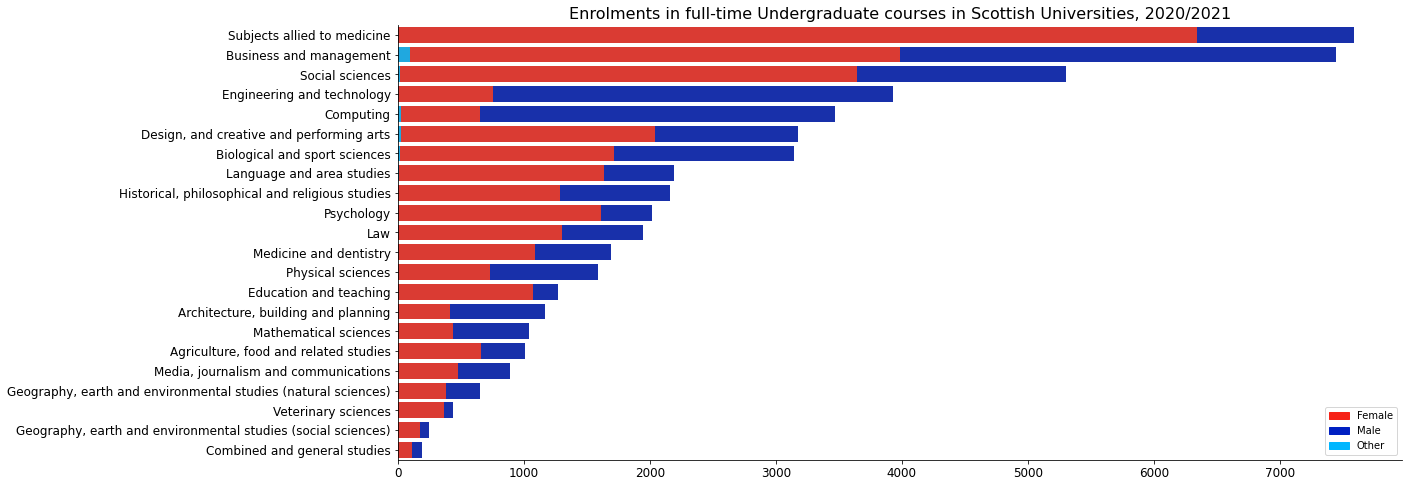

In [57]:
# Get subject list ordered by student enrolment
sort_ix = pivot.sort_values(by="Total", ascending = False)["cah_level_1"].unique()

male_color = "#0020C2"
female_color = "#F62217"
other_color = "#00b6ff"

ticks_size = 12

# Plot actual numbers of enrolment
plt.figure(figsize=(18,8))
t = sns.barplot(x="Total", y="cah_level_1", order = sort_ix, palette=[male_color], data=pivot)
f = sns.barplot(x="Female", y="cah_level_1", order = sort_ix, palette=[female_color], data=pivot)
o = sns.barplot(x="Other", y="cah_level_1", order = sort_ix, palette=[other_color], data=pivot)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

plt.title("Enrolments in full-time Undergraduate courses in Scottish Universities, 2020/2021", size=16)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=ticks_size)
plt.xticks(size=ticks_size)
sns.despine()
plt.show()

In [58]:
# Filter out "Total"
ft_ug_scotland_f_m_o = ft_ug_scotland[(ft_ug_scotland["sex"] != "Total")].copy()

# Calculate percentages of female enrolment per subject
total = ft_ug_scotland_f_m_o.groupby('cah_level_1')['number'].sum().reset_index()
female = ft_ug_scotland_f_m_o[ft_ug_scotland_f_m_o["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
other = ft_ug_scotland_f_m_o[ft_ug_scotland_f_m_o["sex"] == 'Other'].groupby('cah_level_1')['number'].sum().reset_index()

female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
other['number'] = [i / j * 100 for i,j in zip(other['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)
order_ug_ft = female["cah_level_1"]

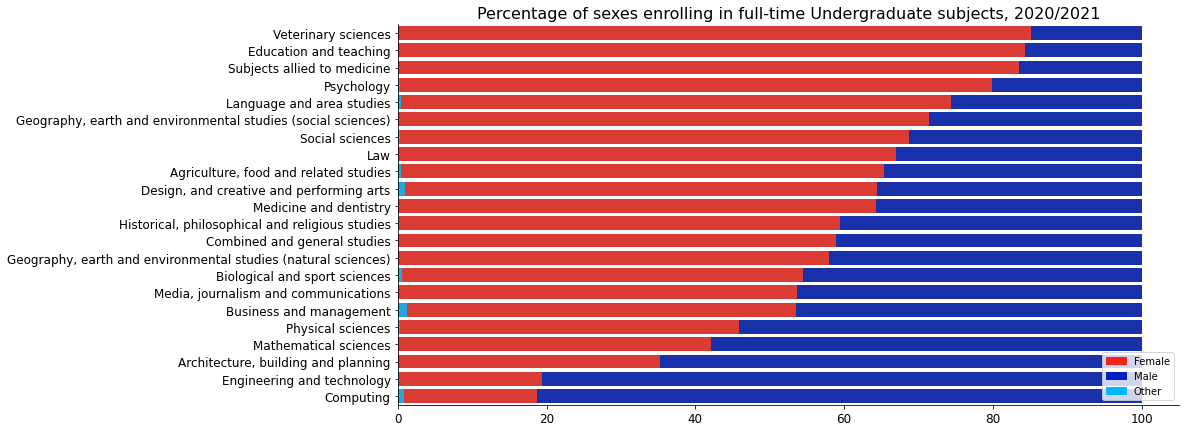

In [59]:
# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'males')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, order=female["cah_level_1"], color=male_color)

# bar chart 3 -> middle bars (group of 'females')
bar3 = sns.barplot(x="number", y="cah_level_1", data=female, order=female["cah_level_1"], color=female_color)

# bar chart 3 -> bottom bars (group of 'other')
bar2 = sns.barplot(x="number", y="cah_level_1", data=other, order=female["cah_level_1"], color=other_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

# show the graph
plt.title("Percentage of sexes enrolling in full-time Undergraduate subjects, 2020/2021", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

Although Computing has the fifth largest number in enrolments,females only make up 18.73% of the total enrolments. Similarly, only 19.44% of students enrolling in Engineering and techonology were female.



***
**Enrolment in part-time undergraduate subjects at Scottish Universities in 2020-2021**




In [65]:
# Filter for Scotland, Undergraduate level of study, and part-time study
pt_ug_scotland = df_clean[(df_clean["first_year_marker"] == "First year")
                     & (df_clean["country_of_he_provider"] == "Scotland")
                     & (df_clean["level_of_study"] == "All undergraduate")
                     & (df_clean["mode_of_study"] == "Part-time")].copy()

# Part-time, UG subjects
ug_pt = pd.pivot_table(pt_ug_scotland, values="number", index="cah_level_1", columns="sex").reset_index()
ug_pt.sort_values(by="Female", ascending=False, inplace=True)

# Percentage of female
ug_pt["% Female"] = round((ug_pt["Female"] / ug_pt["Total"]) * 100, 2)
ug_pt.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(20, 235, n=100, center="light", as_cmap=True)
ug_pt.style.background_gradient(cmap=cm, subset=["% Female"])


sex,cah_level_1,Female,Male,Not known,Other,Total,% Female
20,Subjects allied to medicine,2410.000000,290.000000,0.000000,0.000000,2700.000000,89.260000
19,Social sciences,1440.000000,320.000000,0.000000,5.000000,1765.000000,81.590000
7,Education and teaching,880.000000,225.000000,0.000000,0.000000,1105.000000,79.640000
18,Psychology,1060.000000,315.000000,0.000000,30.000000,1405.000000,75.440000
16,Medicine and dentistry,20.000000,10.000000,0.000000,0.000000,30.000000,66.670000
4,Combined and general studies,2810.000000,1565.000000,0.000000,5.000000,4385.000000,64.080000
12,Language and area studies,1260.000000,675.000000,0.000000,90.000000,2025.000000,62.220000
6,"Design, and creative and performing arts",275.000000,150.000000,0.000000,30.000000,455.000000,60.440000
13,Law,180.000000,115.000000,0.000000,0.000000,300.000000,60.000000
3,Business and management,850.000000,640.000000,0.000000,5.000000,1495.000000,56.860000


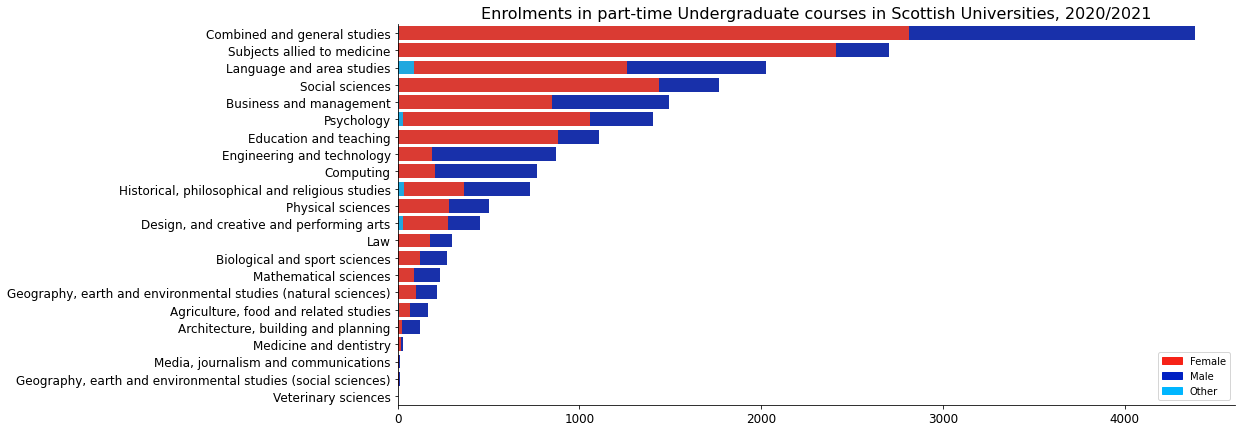

In [70]:
# Get subject list ordered by student enrolment
ug_pt_ix = ug_pt.sort_values(by="Total", ascending = False)["cah_level_1"].unique()

# Plot actual numbers of enrolment
plt.figure(figsize=(15,7))
t = sns.barplot(x="Total", y="cah_level_1", order = ug_pt_ix, palette=[male_color], data=ug_pt)
f = sns.barplot(x="Female", y="cah_level_1", order = ug_pt_ix, palette=[female_color], data=ug_pt)
o = sns.barplot(x="Other", y="cah_level_1", order = ug_pt_ix, palette=[other_color], data=ug_pt)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

plt.title("Enrolments in part-time Undergraduate courses in Scottish Universities, 2020/2021", size=16)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=ticks_size)
plt.xticks(size=ticks_size)
sns.despine()
plt.show()

The percentage of females enrolling in part-time Undergraduate Computing subjects is higher (26.80%) than in full-time Computing courses (18.73%). 

***
**Enrolment in full-time postgraduate subjects at Scottish Universities in 2020-2021**

In [66]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_pg_scotland = df_clean[(df_clean["first_year_marker"] == "First year")
                     & (df_clean["country_of_he_provider"] == "Scotland")
                     & (df_clean["level_of_study"] == "All postgraduate")
                     & (df_clean["mode_of_study"] == "Full-time")].copy()

In [67]:
# Full time, Post Graduate subjects
pg_ft = pd.pivot_table(ft_pg_scotland, values="number", index="cah_level_1", columns="sex").reset_index()
pg_ft.sort_values(by="Female", ascending=False, inplace=True)

# Percentage of female
pg_ft["% Female"] = round((pg_ft["Female"] / pg_ft["Total"]) * 100, 2)
pg_ft.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(20, 235, n=100, center="light", as_cmap=True)
pg_ft.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Not known,Other,Total,% Female
18,Psychology,1080.000000,280.000000,0.000000,5.000000,1365.000000,79.120000
7,Education and teaching,3620.000000,950.000000,0.000000,10.000000,4580.000000,79.040000
20,Subjects allied to medicine,1485.000000,505.000000,0.000000,5.000000,1995.000000,74.440000
15,"Media, journalism and communications",690.000000,255.000000,0.000000,5.000000,945.000000,73.020000
10,"Geography, earth and environmental studies (social sciences)",125.000000,50.000000,0.000000,0.000000,175.000000,71.430000
6,"Design, and creative and performing arts",855.000000,355.000000,0.000000,10.000000,1220.000000,70.080000
12,Language and area studies,825.000000,350.000000,0.000000,15.000000,1190.000000,69.330000
21,Veterinary sciences,40.000000,20.000000,0.000000,0.000000,60.000000,66.670000
19,Social sciences,1910.000000,985.000000,0.000000,5.000000,2905.000000,65.750000
4,Combined and general studies,210.000000,105.000000,0.000000,0.000000,320.000000,65.620000


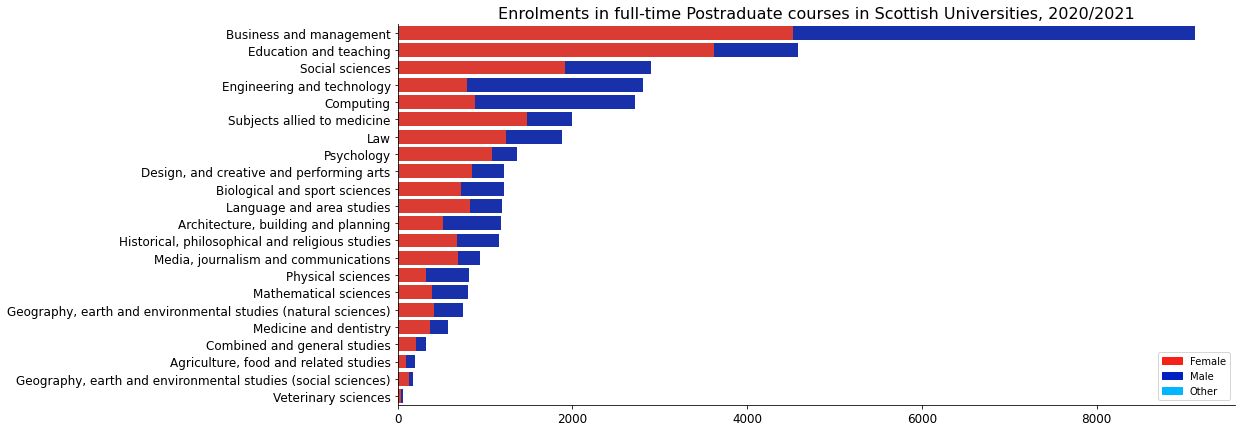

In [68]:
# Get subject list ordered by student enrolment
pg_ft_ix = pg_ft.sort_values(by="Total", ascending = False)["cah_level_1"].unique()

# Plot actual numbers of enrolment
plt.figure(figsize=(15,7))
t = sns.barplot(x="Total", y="cah_level_1", order = pg_ft_ix, palette=[male_color], data=pg_ft)
f = sns.barplot(x="Female", y="cah_level_1", order = pg_ft_ix, palette=[female_color], data=pg_ft)
o = sns.barplot(x="Other", y="cah_level_1", order = pg_ft_ix, palette=[other_color], data=pg_ft)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

plt.title("Enrolments in full-time Postraduate courses in Scottish Universities, 2020/2021", size=16)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=ticks_size)
plt.xticks(size=ticks_size)
sns.despine()
plt.show()

The percentage (32.60%) of females enrolling in full-time postgraduate Computing courses is higher than the percentage of females enrolling in full-time (18.73%) or part-time (26.80%) undergraduate Computing courses.